## This code compares the actions of concepts users with non-concepts users.

In [17]:
import os, squarify, pandas as pd, matplotlib.pyplot as plt

from weco_datascience.reporting import get_recent_data

In [18]:
df = get_recent_data(config=os.environ, n=100000, index="metrics-conversion-prod")

/opt/conda/lib/python3.8/site-packages/elasticsearch/helpers/actions.py:568: ElasticsearchWarning: The client is unable to verify that the server is Elasticsearch due security privileges on the server side
  resp = client.search(


### [Definitions of actions] (https://app.gitbook.com/o/-LumfFcEMKx4gYXKAZTQ/s/MM8zK9GZyFCpy8kvd5Km/analytics-and-reporting/kibana-definitions) are translated into code below

In [ ]:
concepts = df.loc[(df["page.name"]=="concept")]
concepts["action"]="concepts"
search = df.loc[(df["page.name"].isin(
    ["works", "search", "images"])) & (
    df["page.query.query"].notnull()) & (df["properties.event"].isnull())]
search["action"]="search"
works =  df.loc[(df["page.name"]=="work") & (df["page.query.workId"].notnull())]
works["action"]="works"
item_view = df.loc[(df["page.name"]=="item") & (
    df["properties.event"]!="download") & (df["source"]!="viewer/scroll")]
item_view["action"]="item_vew"
image_view =  df.loc[(df["page.name"]=="image") & (df["type"]=="pageview")]
image_view["action"]="image_view"
image_modal = df.loc[(df["page.name"]=="images") & (
    df["properties.event"]=="Open image modal") & (df["page.query.query"].notnull())]
image_modal["action"]="image_modal"
exhibition = df.loc[(df["page.name"]=="exhibition")]
exhibition["action"]="exhibition"
story = df.loc[(df["page.name"]=="story")]
story["action"]="story"

In [20]:
selected=[concepts, search, works, item_view, image_view, image_modal, exhibition, story]
df2=pd.concat(selected)

In [21]:
df3=df2[["@timestamp", "anonymousId", "page.query.query", "page.query.workId", "page.name", "properties.event", "action"]]

In [22]:
print("Data has been taken from", df.tail(1)["@timestamp"])

Data has been taken from 99999    2023-09-10T21:34:42.650Z
Name: @timestamp, dtype: object


In [23]:
print("to", df.head(1)["@timestamp"])

to 0    2023-09-12T13:39:01.089Z
Name: @timestamp, dtype: object


### Capturing concepts user behaviour

In [24]:
concepts_users=concepts["anonymousId"].drop_duplicates()
concepts_ids=concepts_users.values.tolist()

In [25]:
concepts_behaviour=df3[df3["anonymousId"].isin(concepts_ids)]
concepts_behaviour2=concepts_behaviour["action"]

### Summarising concepts user behaviour by action

In [26]:
x=((concepts_behaviour2.value_counts()).to_frame())
y=x.rename(columns={"action":"count"})
#y=x.to_frame()
#y
y["action"]=y.index

### Capturing non-concepts user behaviour

In [27]:
non_concepts_behaviour=df3[df3["anonymousId"].isin(concepts_ids)==False]
non_concepts_behaviour2=non_concepts_behaviour["action"]

### Summarising non-concepts user behaviour by action

In [28]:
a=(non_concepts_behaviour2.value_counts()).to_frame()
b=a.rename(columns={"action":"count"})
b["action"]=b.index

### Here's what user behaviour looks like: concepts users vs non-concepts users

Tree map of user actions for 5620 Concepts users


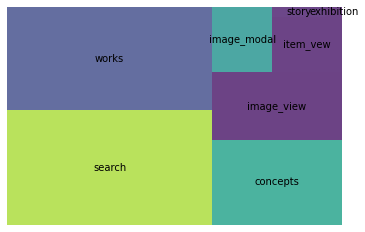

In [29]:
print("Tree map of user actions for",len(concepts_behaviour),"Concepts users")
squarify.plot(sizes=y['count'], label=y['action'], alpha=.8 )
plt.axis('off')
plt.show()

Tree map of user actions for 46814 non-Concepts users


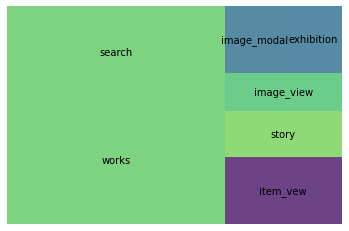

In [30]:
print("Tree map of user actions for",len(non_concepts_behaviour),"non-Concepts users")
squarify.plot(sizes=b['count'], label=b['action'], alpha=.8)
plt.axis('off')
plt.show()

### What does the tree map look like if we take out the action concepts?

In [31]:
d=((concepts_behaviour2.value_counts()).to_frame())
e=d.rename(columns={"action":"count"})
e["action"]=e.index
f=e.loc[(e["action"]!="concepts")]

Tree map of user actions for 5620 Concepts users


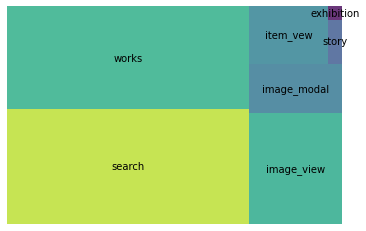

In [32]:
print("Tree map of user actions for",len(concepts_behaviour),"Concepts users")
squarify.plot(sizes=f['count'], label=f['action'], alpha=.8 )
plt.axis('off')
plt.show()
